# 多项式回归
之前我们学习的线性回归，对于我们的数据有一定的要求就是假设我们的数据是具有一定的线性关系的， 但是要求数据具有线性关系的数据集相对来说是比较少的，更多的数据集具有的是非线性的关系。

这里我们可以使用一种非常简单的手段，就可以改变线性回归法，使得它可以对非线性的数据进行处理和预测，也就是所谓的多项式回归，此外，

还将借助多项式回归引出机器学习中最重要的一个概念**模型泛化**

![](img/isea45.jpg)

在前面学习线性回归的过程中，对于这些数据，我们希望寻找到一条直线来最大程度的拟合所有的数据，得到了$y = ax + b$ 这条直线，其中x 是特征，a 和 b 是我们要求的参数。而对于某些数据，虽然我们也可以使用线性回归的方式来拟合这种数据，但是这些数据其实是具有更加强的非线性的关系的，话句话说如果我们使用一个二次曲线来拟合这些数据的话，效果会更好。 

![](img/isea46.jpg)

当前的样本只有一个特征！

对于一个二次曲线来说，方程可以写成上面的形式，在这个公式中，虽然这是一个二次方程，但是我们可以从另外一个角度来理解这个公式，也即将$x^2$ 理解为一个特征 ，$x$理解为另外一个特征（本来我们的样本只有一个特征x）这个公式还是一个线性回归，但是从x的角度来看这是一个非线性的方程。

相对于我们为样本多添加了一些特征的样本，这些特征是原来样本的多项式项。

## 多项式回归的实现

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# 生成数据，在-3 和 3之间生成100个数据
x = np.random.uniform(-3,3,size = 100)
X = x.reshape(-1,1) # 将数据转为一个二维的矩阵
X.shape

(100, 1)

In [27]:
# 生成y的值 加上一个噪音,以正太分布的方式来取的噪音
y = 0.5 * x ** 2 + x + 2 + np.random.normal(0,1,size = 100)

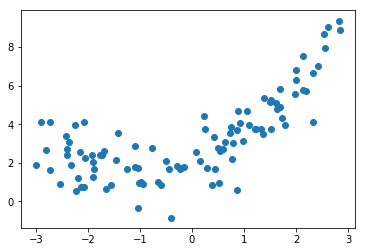

In [28]:
plt.scatter(x,y)
plt.show()

In [29]:
# 用线性回归的方式来拟合一下我们的数据集
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X,y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [30]:
# 对X样本中的数据，进行预测
y_predict = lin_reg.predict(X)

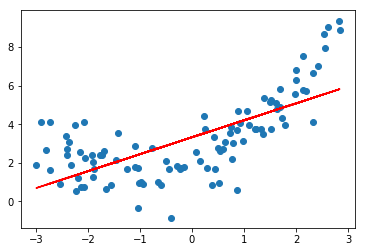

In [31]:
plt.scatter(x,y)
plt.plot(x,y_predict,color = 'r')
plt.show()
# 

可以发现我们使用一根直线来拟合有弧度的曲线，这个拟合效果不够好

### 解决方案，添加一个特征

In [32]:
(X ** 2).shape # 对X中的每一个数据进行一次平方，X ^ 2 又是一个新的特征

(100, 1)

In [33]:
X2 = np.hstack([X,X ** 2])
X2.shape # 如今新形成的数据集有两个特征

(100, 2)

In [34]:
lin_reg2 = LinearRegression()
lin_reg2.fit(X2,y)
y_predict2 = lin_reg2.predict(X2)

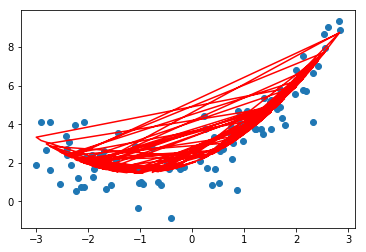

In [35]:
# 绘制图像的错误示范：
plt.scatter(x,y)
plt.plot(x,y_predict2,color = 'r')
plt.show()

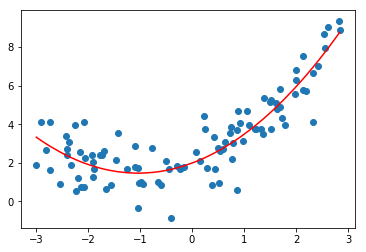

In [36]:
# 如果我们想要生成一条平滑的曲线，相应的我们需要对x进行排序，也即在绘制曲线的时候，
# 要依照x从小到大的顺序来绘制，y值应该是x排完序之后对应的y的预测值
plt.scatter(x,y)
plt.plot(np.sort(x),y_predict2[np.argsort(x)],color = 'r')
plt.show()

我们对原来的数据集添加了一个特征，这个特征是我们自己造的特征，该特征就是原来所有的特征进行平方，当我们添加了平方之后，我们从$x$的维度来看，就行成一条曲线，这条曲线对我们数据的拟合程度是更好的。 

> 多项式回归在机器学习算法中并没有新的地方，完全是使用线性回归的思路，他的关键在于为原来的数据样本添加的新的特征，得到新的特征的方式是原有的特征的新的组合，使用这样的方式就可以解决一些非线性的问题。

PCA是对数据进行降维处理，多项式回归对数据进行升维。在升高了维度之后，使得我们的算法能够更好的拟合我们的数据，这种思维在SVM也有应用。 

In [37]:
# 查看lin_reg2的系数是：
lin_reg2.coef_
# 第一个系数是x前前面的系数，第二个系数是x ^ 2 的系数。

array([1.00731587, 0.48739451])

In [38]:
# 查看截距的值
lin_reg2.intercept_

1.9805419542026024

### sklearn中多项式回归和Pipeline

In [15]:
import numpy as np 
import matplotlib.pyplot as plt

In [16]:
x = np.random.uniform(-3, 3, size=100)
X = x.reshape(-1, 1)
y = 0.5 * x**2 + x + 2 + np.random.normal(0, 1, 100)

In [6]:
from sklearn.preprocessing import PolynomialFeatures

In [17]:
# degree表示的是我们要为原本的数据集添加最多几次幂
poly = PolynomialFeatures(degree=2)
poly.fit(X)
X2 = poly.transform(X)

In [18]:
X2.shape

(100, 3)

In [19]:
X[:5,:]

array([[ 1.32247996],
       [-2.89663942],
       [-1.20007349],
       [ 1.90938016],
       [ 1.97870456]])

In [20]:
X2[:5]

array([[ 1.        ,  1.32247996,  1.74895324],
       [ 1.        , -2.89663942,  8.39051994],
       [ 1.        , -1.20007349,  1.44017637],
       [ 1.        ,  1.90938016,  3.64573258],
       [ 1.        ,  1.97870456,  3.91527174]])

X2的第一列都是1，这些1我们可以看做是X的0次方这样的特征，第二列和X和原来样本特征，最后一列就是X的二次方。

In [22]:
from sklearn.linear_model import LinearRegression

lin_reg2 = LinearRegression()
lin_reg2.fit(X2, y)
y_predict2 = lin_reg2.predict(X2)

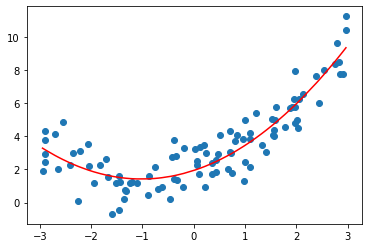

In [23]:
plt.scatter(x, y)
plt.plot(np.sort(x), y_predict2[np.argsort(x)], color='r')
plt.show()

In [24]:
lin_reg2.coef_

array([0.        , 1.01520173, 0.49971819])

In [25]:
lin_reg2.intercept_ 

1.9373215008495428

### 关于PolynomialFeatures

看一下如果原始的数据有两列，

In [28]:
X = np.arange(1, 11).reshape(-1, 2)
X

array([[ 1,  2],
       [ 3,  4],
       [ 5,  6],
       [ 7,  8],
       [ 9, 10]])

In [33]:
# 将原来的数据集最多添加几次幂
poly = PolynomialFeatures(degree=2)
poly.fit(X)
X2 = poly.transform(X)

In [34]:
X2.shape

(5, 6)

In [35]:
X2

array([[  1.,   1.,   2.,   1.,   2.,   4.],
       [  1.,   3.,   4.,   9.,  12.,  16.],
       [  1.,   5.,   6.,  25.,  30.,  36.],
       [  1.,   7.,   8.,  49.,  56.,  64.],
       [  1.,   9.,  10.,  81.,  90., 100.]])

 第一列：对应的是x的零次幂；
 第二列和第三列：就是原来的X矩阵，此时有两列一次幂的项
 最后三列是，二次幂的项，第四列和第六列是原来一次幂的平方，第五列是原来X两列相乘的结果。

### Pipeline

In [40]:
x = np.random.uniform(-3, 3, size=100)
X = x.reshape(-1, 1)
y = 0.5 * x**2 + x + 2 + np.random.normal(0, 1, 100)

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# 在管道中传入每一次对应的步骤
poly_reg = Pipeline([
    ("poly", PolynomialFeatures(degree=2)),
    # 这里规避掉平方带来的数据的尺度不一，对数据进行归一化
    ("std_scaler", StandardScaler()),
    ("lin_reg", LinearRegression())
])

In [41]:
poly_reg.fit(X, y)
y_predict = poly_reg.predict(X)

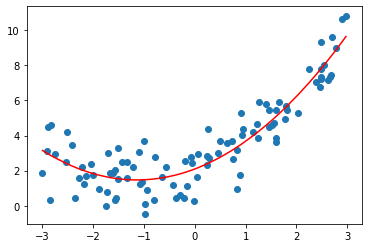

In [42]:
plt.scatter(x, y)
plt.plot(np.sort(x), y_predict[np.argsort(x)], color='r')
plt.show()

我们有了多项式回归，就可以非常方便的对非线性数据进行拟合不过这个拟合的过程是有陷进的，接下来我们看模型泛化相关的内容